In [4]:
#Import required libraries
import pandas as pd
import numpy as np

#read the data
dataset = pd.read_csv('Output50.csv')
dataset2 = pd.read_csv('Labels50.csv')
dataset.head()

,Unnamed: 0,Mean_R,RMS_R,Median_R,Variance_R,Std_R,Skewness_R,Kurtosis_R,Contrast_R,Entropy_R,...,Std_B,Skewness_B,Kurtosis_B,Contrast_B,Entropy_B,Energy_B,Homogeneity_B,Correlation_B,IDM_B,Smoothness_B
0,0,0.615906,0.647390,0.666667,0.039774,0.199434,-1.203720,1.043160,7.345089,1067.719056,...,0.246928,-0.536457,-0.886165,7.644662,1066.750061,0.010549,0.061569,0.865662,0.000937,0.016277
1,1,0.601843,0.613361,0.610442,0.013997,0.118309,-0.487669,0.270238,6.802835,34.087776,...,0.218888,-0.057730,-1.333483,7.378847,35.505836,0.029005,0.316569,0.994301,0.027415,0.000541
2,2,0.589557,0.603615,0.603922,0.016774,0.129514,-1.455419,3.881179,6.846667,556.640227,...,0.206923,-0.172456,-1.304718,7.424229,559.090227,0.011576,0.073901,0.899716,0.001785,0.008531
3,3,0.434695,0.445520,0.427184,0.009528,0.097614,0.251915,0.099725,6.360808,352.463159,...,0.105455,0.293969,-0.221963,6.458629,350.568689,0.018945,0.103068,0.757522,0.002845,0.005349
4,4,0.540711,0.554805,0.520833,0.015440,0.124258,0.669531,1.080639,6.718661,87.068934,...,0.153227,-0.761599,-0.640430,6.825404,82.646201,0.024041,0.180397,0.972965,0.011959,0.001261


In [8]:
#remove the first column as we do not requre it
dataset1 = dataset.drop(['Unnamed: 0'],  axis=1)
dataset1.head()

,Mean_R,RMS_R,Median_R,Variance_R,Std_R,Skewness_R,Kurtosis_R,Contrast_R,Entropy_R,Energy_R,...,Std_B,Skewness_B,Kurtosis_B,Contrast_B,Entropy_B,Energy_B,Homogeneity_B,Correlation_B,IDM_B,Smoothness_B
0,0.615906,0.647390,0.666667,0.039774,0.199434,-1.203720,1.043160,7.345089,1067.719056,0.010839,...,0.246928,-0.536457,-0.886165,7.644662,1066.750061,0.010549,0.061569,0.865662,0.000937,0.016277
1,0.601843,0.613361,0.610442,0.013997,0.118309,-0.487669,0.270238,6.802835,34.087776,0.034179,...,0.218888,-0.057730,-1.333483,7.378847,35.505836,0.029005,0.316569,0.994301,0.027415,0.000541
2,0.589557,0.603615,0.603922,0.016774,0.129514,-1.455419,3.881179,6.846667,556.640227,0.014061,...,0.206923,-0.172456,-1.304718,7.424229,559.090227,0.011576,0.073901,0.899716,0.001785,0.008531
3,0.434695,0.445520,0.427184,0.009528,0.097614,0.251915,0.099725,6.360808,352.463159,0.020138,...,0.105455,0.293969,-0.221963,6.458629,350.568689,0.018945,0.103068,0.757522,0.002845,0.005349
4,0.540711,0.554805,0.520833,0.015440,0.124258,0.669531,1.080639,6.718661,87.068934,0.025783,...,0.153227,-0.761599,-0.640430,6.825404,82.646201,0.024041,0.180397,0.972965,0.011959,0.001261


In [64]:
#classify data into dependent and independent variables
x = dataset1.iloc[:, :]
y = dataset2.iloc[:, :]

#spli data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

#train the model and predict
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

#accuracy
from sklearn.metrics import accuracy_score
print("The accuracy is ", accuracy_score(y_test, pred))

The accuracy is  0.9333333333333333


/home/uca/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [65]:
#now test the accuracy x_train data

x_train_pred = knn.predict(x_train)

print("The accuracy for train data is ", accuracy_score(y_train, x_train_pred))

The accuracy for train data is  0.9035294117647059


[[ 0  5]
 [ 0 70]]


<Axes: >

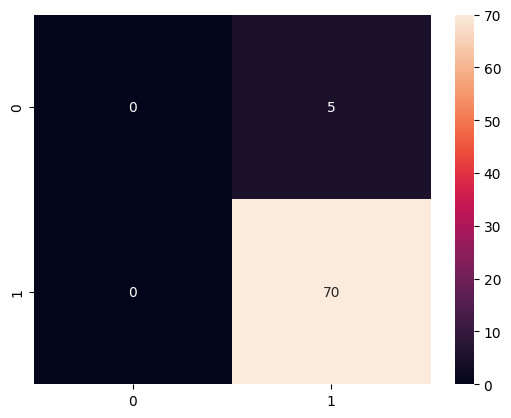

In [66]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm_matrix = confusion_matrix(y_test, pred)
print(cm_matrix)

#create a heatmap to analyze the results
import seaborn as sns
sns.heatmap(cm_matrix, annot=True)

<Axes: >

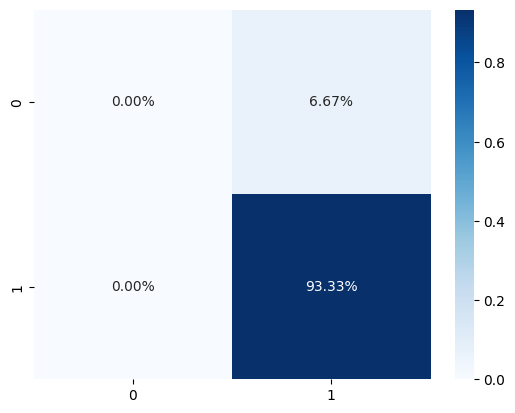

In [67]:
sns.heatmap(cm_matrix/np.sum(cm_matrix), annot=True, 
            fmt='.2%', cmap='Blues')